In [1]:
import PIL
import cv2

import matplotlib.pyplot as plt

from PIL import Image

# Working with Pixels

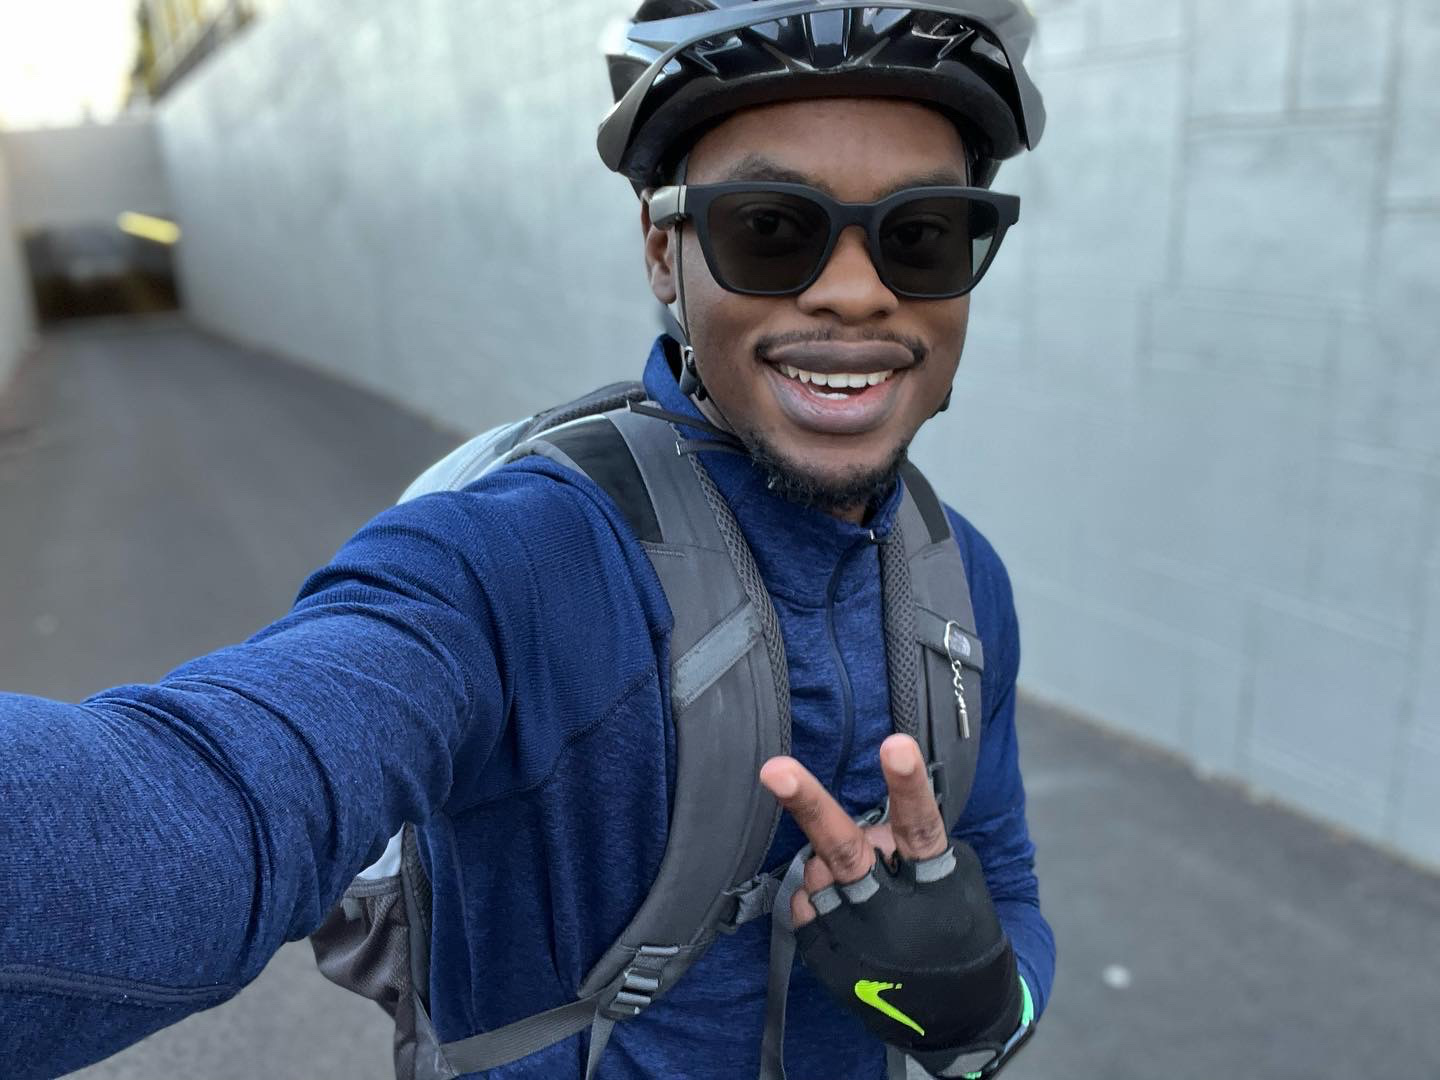

In [2]:
imageFilePath = "./skate.jpg"
image = Image.open(imageFilePath)
image

In [3]:
width, height = image.size
image.size

(1440, 1080)

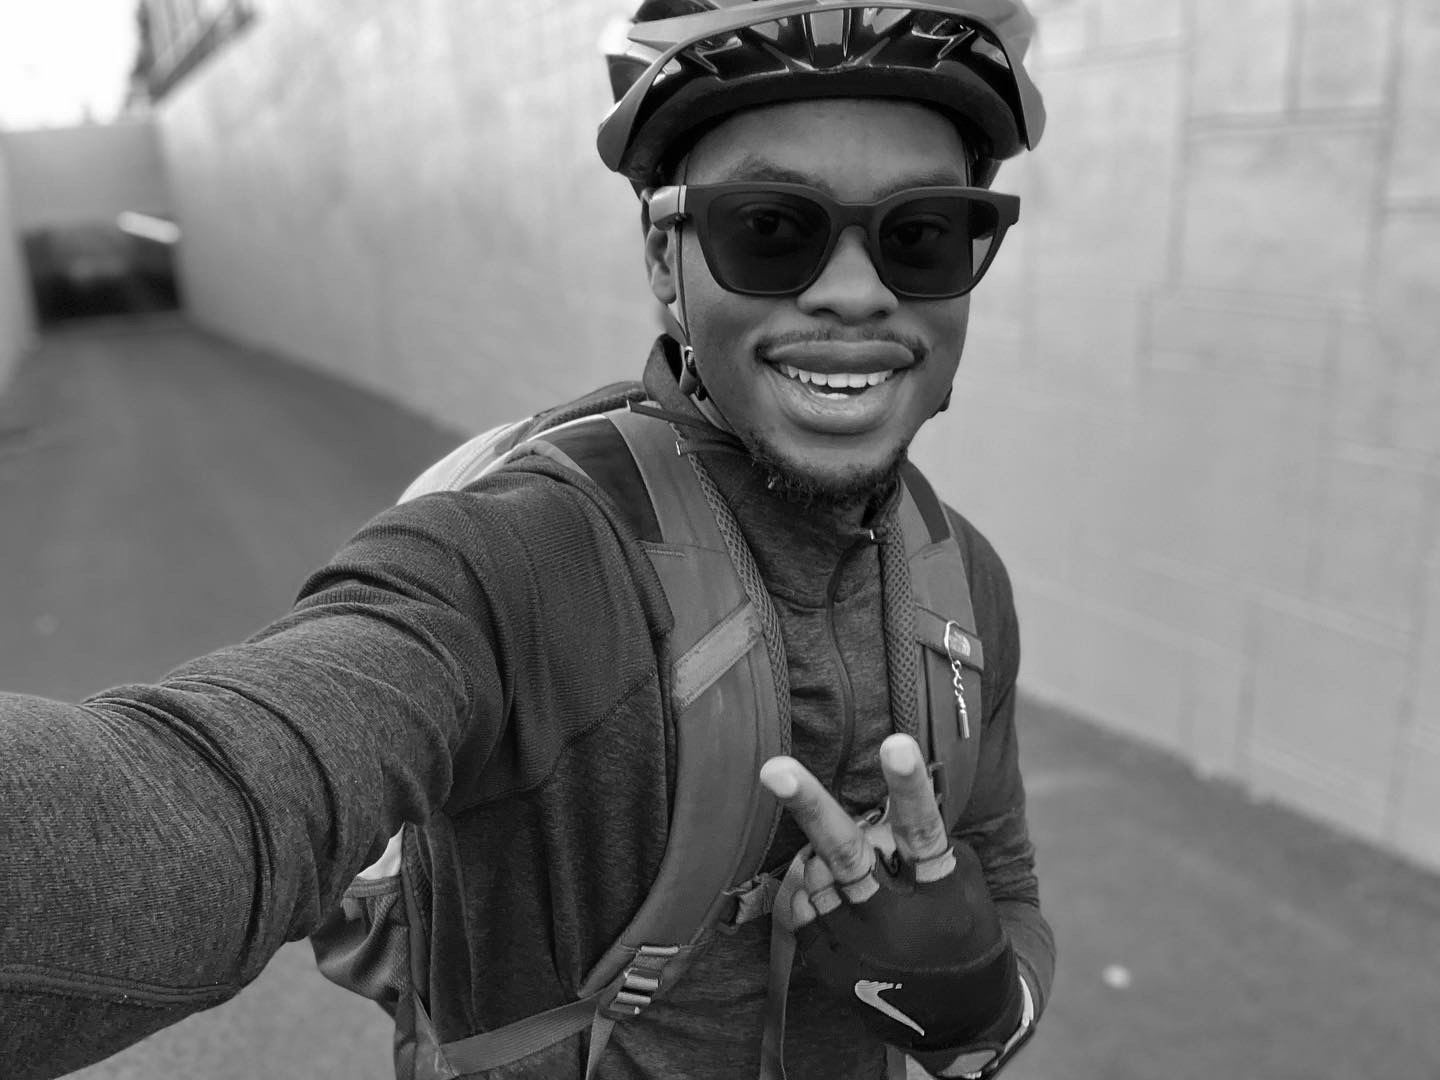

In [4]:
def ConvertToGrayScale(img, weights=[0.2, 0.5, 0.1]):
    image_ = img.copy()
    width, height = img.copy().size
    image_pixel_matrix = image_.load()
    for i in range(width):
        for j in range(height):
            red, green, blue = image.getpixel((i, j))
            gray_scale = int((
                weights[0]*red+
                weights[1]*green+
                weights[2]*blue)/3)
            image_pixel_matrix[i, j]= (gray_scale, gray_scale, gray_scale)
    return image_
        
ConvertToGrayScale(image, [1, 1, 1])

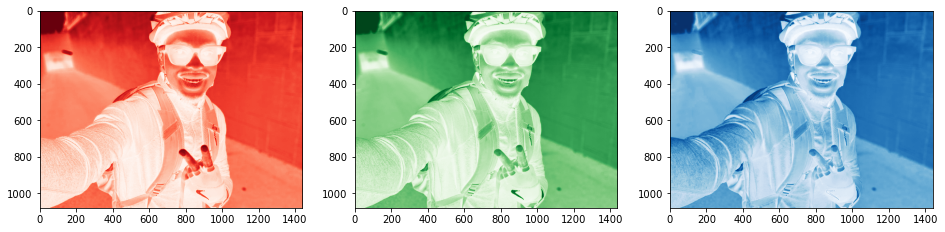

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(image.getchannel('R'), cmap="Reds")
axes[1].imshow(image.getchannel('G'), cmap="Greens")
axes[2].imshow(image.getchannel('B'), cmap="Blues")
plt.show()

# Brightness

In [6]:
cv2Image = cv2.imread(imageFilePath)
cv2Image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       ...,

       [[ 64,  31,  12],
        [ 61,  28,   9],
        [ 67,  34,  15],
        ...,
        [119, 110,  97],
        [119, 110,  97],
        [119, 110,  97]],

       [[ 62,  29,  10],
        [ 57,  24,   5],
        [ 66,  33,  14],
        ...,
        [119, 110,  97],
        [119, 110,  97],
        [119, 110,  97]],

       [[ 61,  28,   9],
        [ 55,  22,   3],
        [ 66,  33,  14],
        ...,
        [119, 110,  97],
        [118, 109,  96],
        [118, 109,  96]]

In [7]:
cv2Image.shape

(1080, 1440, 3)

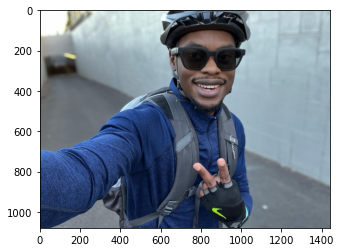

In [8]:
image_rgb = cv2.cvtColor(cv2Image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [9]:
def adjust_brightness(img, alpha = 0, beta = 0):
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

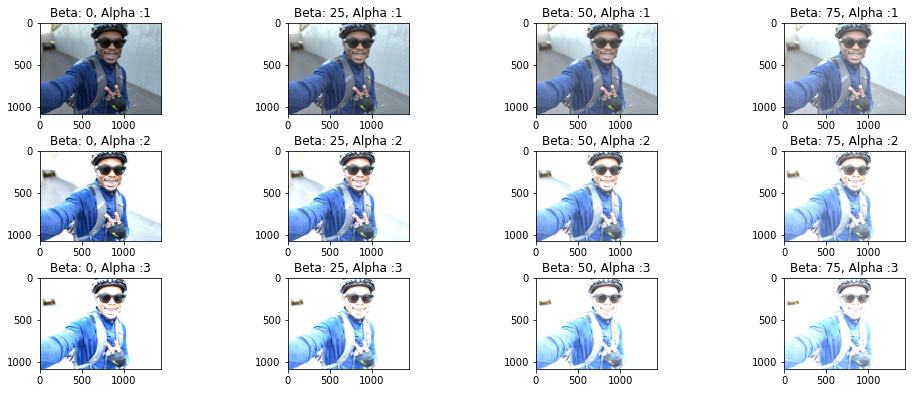

In [26]:
fig, axes = plt.subplots(3, 4, figsize=(16, 6))

index_beta = 0;
index_alpha = 0
for alpha in range(1, 4, 1):
    for beta in range(0, 100, 25):
        axes[index_alpha][index_beta].imshow(adjust_brightness(image_rgb, alpha = alpha, beta = beta))
        axes[index_alpha][index_beta].set_title(f"Beta: {beta}, Alpha :{alpha}")
        index_beta += 1
    index_beta = 0
    index_alpha += 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Guassian Blur

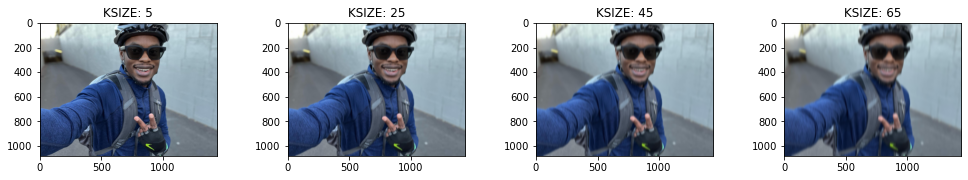

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

index = 0
for size in range(5, 85, 20):
    axes[index].imshow(cv2.GaussianBlur(image_rgb, ksize=(5, size), sigmaX=0))
    axes[index].set_title(f"KSIZE: {size}")
    index += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Cropping

In [48]:
image_rgb.shape

(1080, 1440, 3)

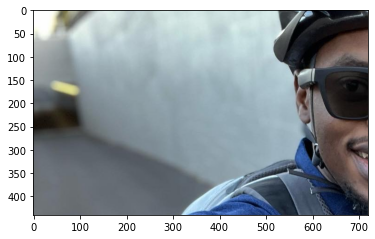

In [64]:
plt.imshow(image_rgb[60:500,80:800])
plt.show()